## Exploratory Data Analysis and Species Prediction using Iris Species Dataset

This notebook attempts at doing some basic EDA on the Iris dataset and train a classification model for predicting the Iris Species. 

I have broken down this notebook into the following sections:

- Understanding at the Data 
- Data Visualizations
- Visualizing Decision Boundaries and building Prediction Models for Iris Species

### Understanding the Data 

In [441]:
# Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [442]:
# Load data into df

df = pd.read_csv('iris.csv')

In [443]:
print(df.shape)
df.info()

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


From the above output it is clear that the Iris dataframe has 150 observations and 6 features - Id, Sepal Length, Sepal Width, Petal Length, Petal Width and Species. There don't seem to be any missing values in any of the columns. We will take a closer look at the all the measurement features to ensure there is not any erroneous data. 
Lets check out the actual data next:

In [444]:
# We can drop the ID column 

df.drop('Id', axis=1, inplace=True)

In [445]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [446]:
# Let's review how many types of species there are and how they are spread across the dataset

df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

The split is even across the species.

In [447]:
# Lets now check out the summary stats for the 4 measurements:

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A better way to review the data would be to visualize it next.

### Data Visualization

We will first visualize the lengths and widths using boxplots. 

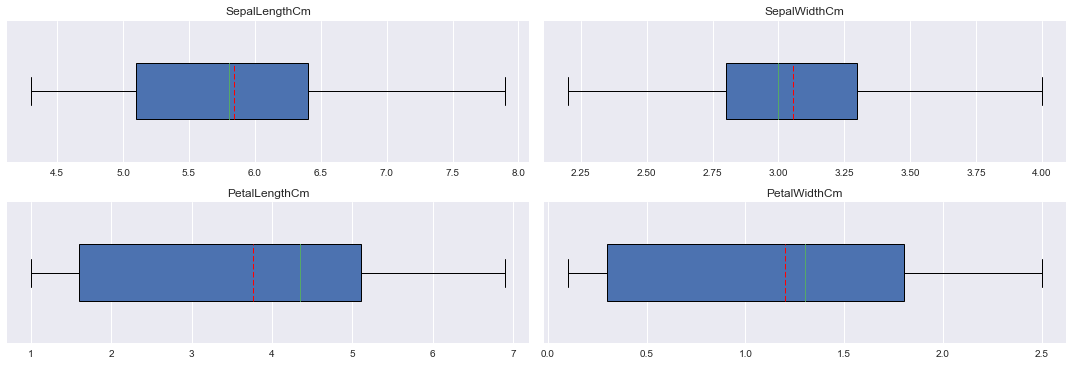

In [448]:
# Boxplots for the measurements of each feature

%matplotlib inline

meanlineprops = dict(linestyle='--', linewidth=1, color='red')

plots = df.columns[0:4]
dims = (15,10)
fig, ax = plt.subplots(figsize=dims)
for n, p in enumerate(plots):
    ax = plt.subplot(len(plots), 2, n+1)
    plt.boxplot(df[plots[n]], vert=False, showfliers=False, showmeans=True, meanline=True, meanprops=meanlineprops, patch_artist=True, widths = 0.4)
    plt.title(plots[n])
    ax.axes.get_yaxis().set_ticks([])

plt.tight_layout()

/Users/pallavishinde/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114c2b390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c25c588>]], dtype=object)

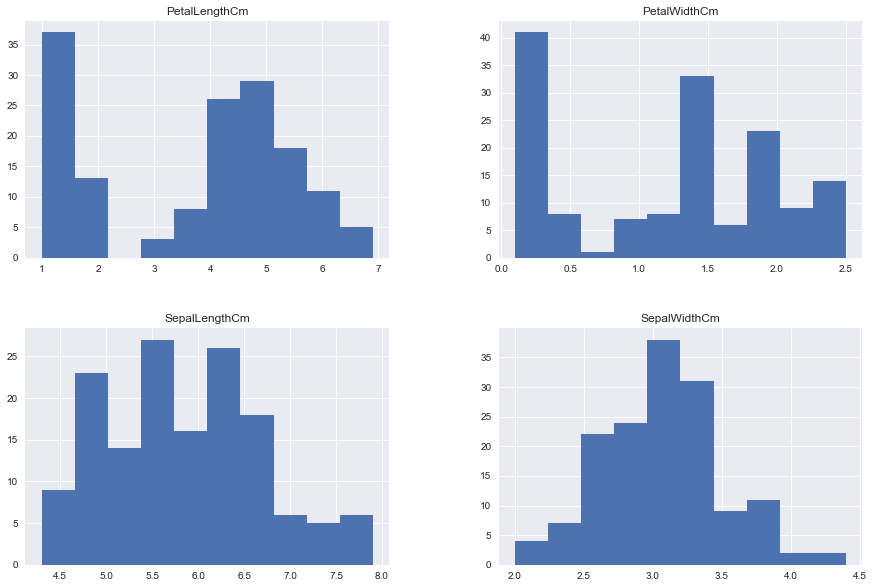

In [449]:
# Histograms to see the distributions for each measurement type

fig, ax = plt.subplots(figsize=dims)
df.hist(ax=ax)


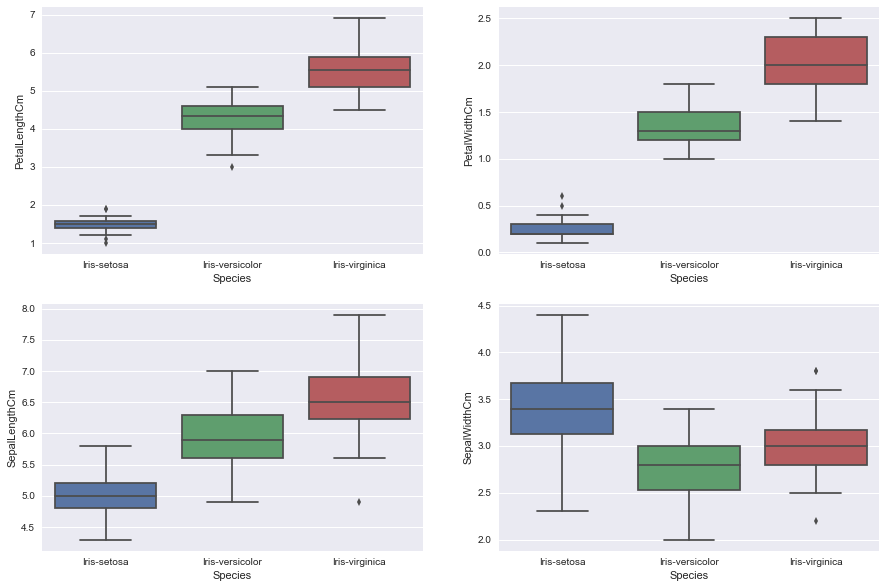

In [450]:
#  Boxplots for the measurements of each feature by Species

fig, ax = plt.subplots(2,2,figsize=dims)
plt.subplot(221)
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
plt.subplot(222)
sns.boxplot(x="Species", y="PetalWidthCm", data=df)
plt.subplot(223)
sns.boxplot(x="Species", y="SepalLengthCm", data=df)
plt.subplot(224)
sns.boxplot(x="Species", y="SepalWidthCm", data=df)

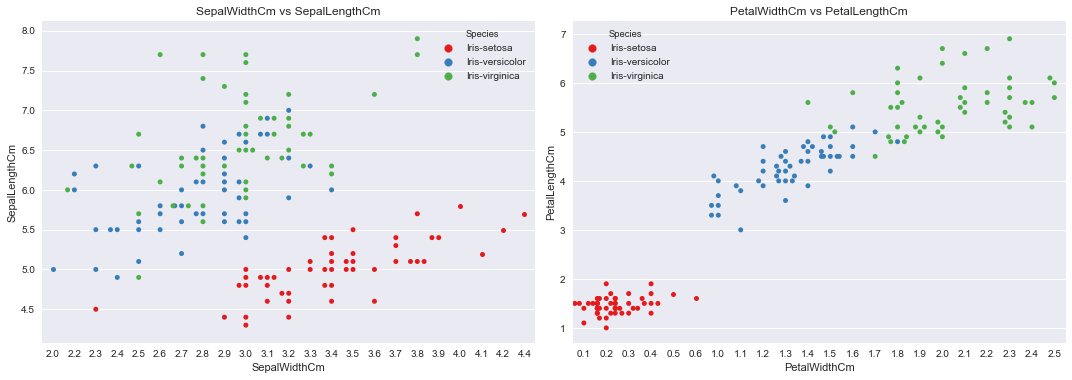

In [451]:
# Swarmplot to show the relationship between Sepal length vs width and Petal length vs width 

plots = [['SepalWidthCm', 'SepalLengthCm'],['PetalWidthCm','PetalLengthCm' ] ]

fig, ax = plt.subplots(figsize=dims)
for n, p in enumerate(plots):
    ax = plt.subplot(len(plots), 2, n+1)
    sns.swarmplot(x=df[p[0]], y=df[p[1]], hue=df['Species'], palette='Set1')
    plt.title(p[0]+' vs '+p[1])


plt.tight_layout()

We can clearly see that the species boundaries are quite distinct when we look at the Petal data. But on the other hand, with Sepal data, there seems to be an overlap between versicolor and virginica. 

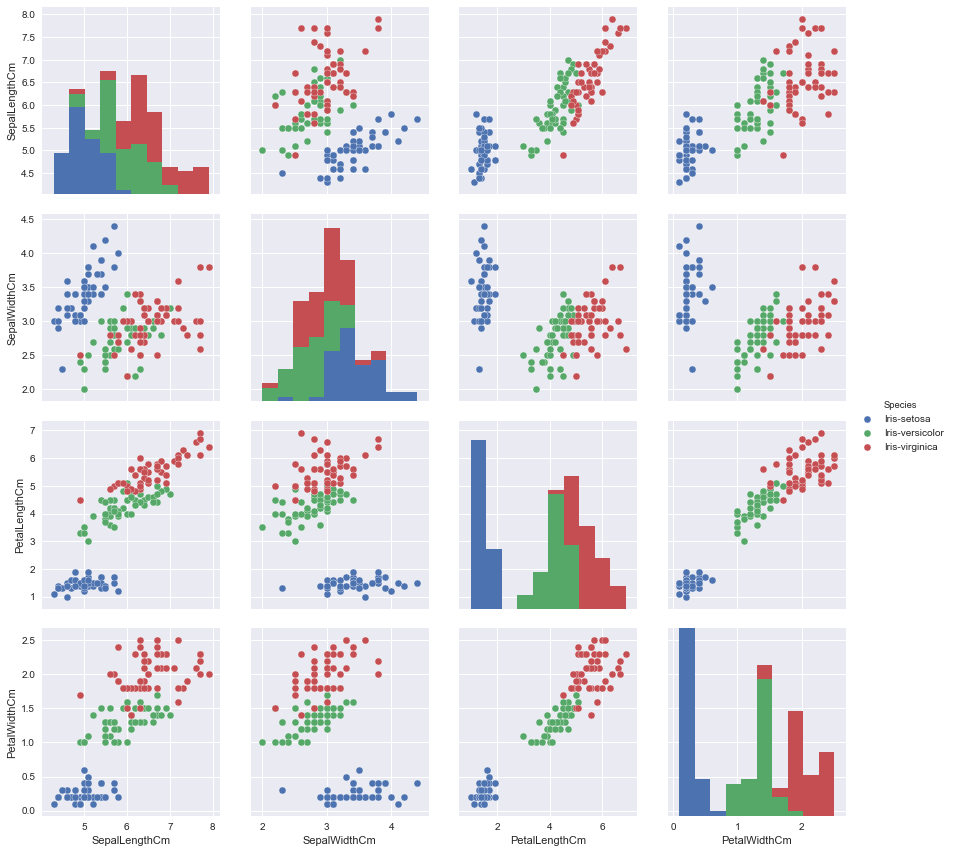

In [452]:
# Plots showing distributions and relationships between each of the features 

sns.pairplot(df, hue="Species", size=3)

Clearly, we can see that setosa is easily demarcated in the plots. The overlap between versicolor and virginica is highest between the sepal dimensions but the relationship with the other features is still somewhat distinct. 

A look at the heatmap of the correlation between the features should reiterate this.  

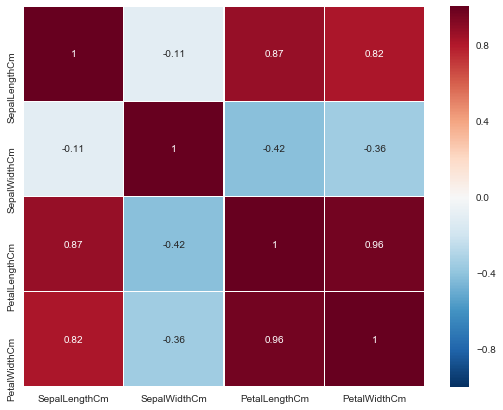

In [453]:
# Heatmap for correlation between the features

fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,linewidths=.5, ax=ax) 

As expected, the sepal length and width are not correlated whereas the petal length and width are highly correlated. 

These plots give us a great overview of how the features are spread across the species and the relationship between them. 

Thus far we have made the following observations:

- The data points by species are clearly demarcated for Setosa
- Setosa petals are smallest, versicolor tend to be the mid-sized in comparison and virginica tend to have the biggest petals
- Sepal widths for Setosa tend to have a wider range than the other two species
- The Sepals for Versicolor and Virginica seem to overlap and tend to be in a similar range
- The Sepal length and width are not correlated whereas the Petal length and width are highly correlated 

We will now move on to making some prediction models and also create some plots showing the decision boundaries.

### Supervised Machine Learning 

We will follow the steps below for selecting a model:

1. Split data into train and test data
2. Visualize decision boundaries based on two of the features for various classifiers
3. Hyper parameter tuning and validation to improve models

### Split the data into train and test data to visualize the decision boundaries

In [454]:
from sklearn.model_selection import train_test_split

# Create matrix with only the Petal Length and Width feature columns and an array target species 

data = df.drop(['Species', 'SepalLengthCm', 'SepalWidthCm'], axis=1).values
target = df['Species'].values

In [455]:
# Encode species : Setosa -  0, Versicolor - 1, Virginica - 2   

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
target = labelencoder_X.fit_transform(target)

In [456]:
# Quick inspection of the new arrays

print(data.shape)
print(target.shape)

(150, 2)
(150,)


In [457]:
# Lets split the data now into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [458]:
# We are using the default 75%-25% split.

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 2) (112,)
(38, 2) (38,)


### Visualizing decision boundaries 

We will be running through the following algorithms:

1. Logistic Regression
2. KNeighborsClassifier
3. Linear SVC
4. Gaussian SVC
5. DecisionTreeClassifier
6. RandomForestClassifier

In [459]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# Imports for visualization, parameter setting and validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap


In [460]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [461]:
# Visualize classifier decision boundaries

def mapBoundaries(X_train, y_train, X_test, y_test, classifier, name):
    classifier.fit(X_train, y_train)
    plt.subplots(figsize=(15,6))
    plt.subplot(121)
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                         np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label=j )
    plt.title(name + ' for Training Set')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()
    plt.subplot(122)
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                         np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label=j )
    plt.title(name + ' for Test Set')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()
    plt.show()
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(classifier)
    print(cm)
    
   

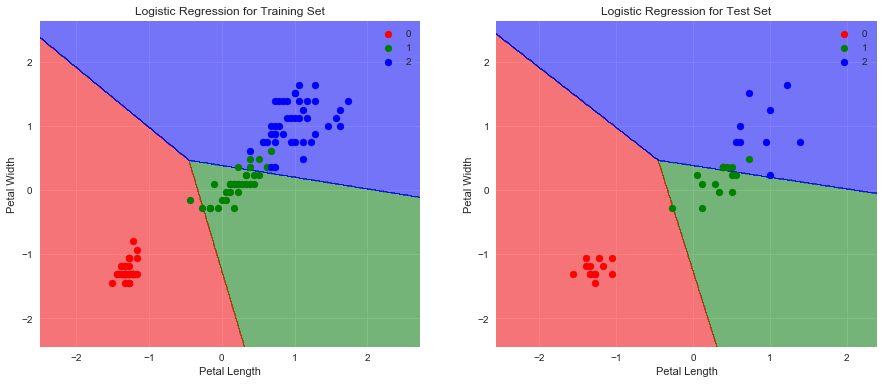

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[13  0  0]
 [ 1  8  7]
 [ 0  0  9]]


In [462]:
# Logistic Regression
#Visualizing the Training and Test Set Results
mapBoundaries(X_train, y_train, X_test, y_test, LogisticRegression(), 'Logistic Regression' )

Looks like it doesn't perform too well. As we expected the Versicolor is not getting classified correctly. Let's try to tune the penalty parameter C a little.

In [463]:
# Logistic Regression

# Create the grid of values for the C parameter
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
print('Parameter Grid : \n{}\n'.format(param_grid))

# We will implement a grid search with a stratified 10 folds cross validation using the Logistic Regression estimator
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10)

# Fit the estimator on the training data and predict on test data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Outputs
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score (on Training Data): {:.2f}\n".format(grid_search.best_score_))
print("Classification report: \n{}".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print('Test score using Logistic Regression: {:.2f}'.format(grid_search.score(X_test, y_test)))


Parameter Grid : 
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}

Best parameters: {'C': 100}
Best cross-validation score (on Training Data): 0.96

Classification report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.94      0.97        16
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38

Confusion Matrix: 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Test score using Logistic Regression: 0.97


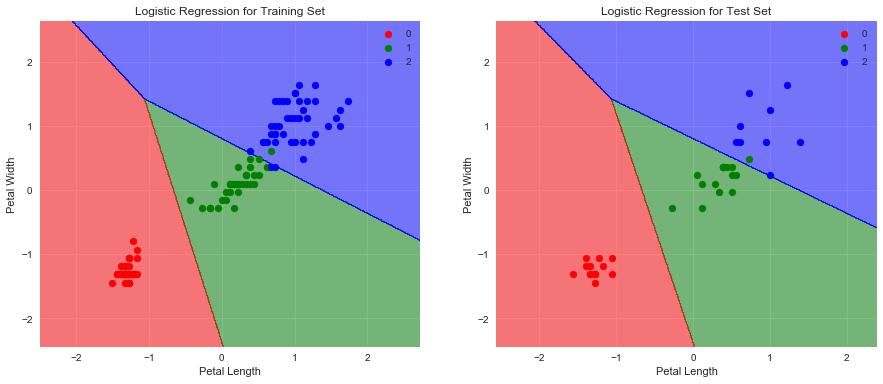

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [464]:
# Boundaries with new parameters
mapBoundaries(X_train, y_train, X_test, y_test, LogisticRegression(C=100), 'Logistic Regression' )

That is a big improvement on both the training and test sets! 

Ok, let us now move on to the next classifier and see if we can improve the performance.

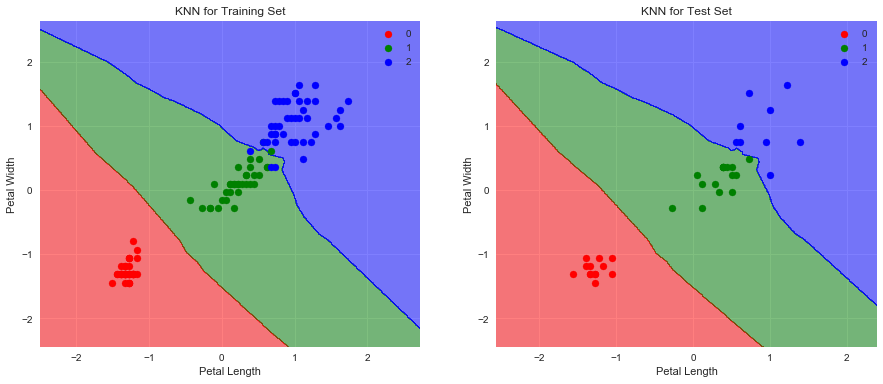

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [465]:
# KNN
#Visualizing the Training and Test Set Results
mapBoundaries(X_train, y_train, X_test, y_test, KNeighborsClassifier(), 'KNN' )

This classifer is performing surprisingly well. But we should be careful about overfitting here. The decision boundary between Versicolor and Virginica doesn't seem very smooth - but is definitely much smoother after feature scaling. 

It performs better on the test set compare to the training set. Let us try to tune the n_neighbors parameter below to see if can make that decision boundary even smoother. 

In [466]:
# KNeighborsClassifier

# Create the grid of values for the n_neighbors parameter
param_grid = {'n_neighbors' : [1,3,5,7,9,11]}
print('Parameter Grid : \n{}\n'.format(param_grid))

# We will implement a grid search with a stratified 10 folds cross validation using the KNeighborsClassifier estimator
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

# Fit the estimator on the training data and predict on test data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Outputs
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score (on Training Data): {:.2f}\n".format(grid_search.best_score_))
print("Classification report: \n{}".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print('Test score using KNeighborsClassifier: {:.2f}'.format(grid_search.score(X_test, y_test)))

Parameter Grid : 
{'n_neighbors': [1, 3, 5, 7, 9, 11]}

Best parameters: {'n_neighbors': 5}
Best cross-validation score (on Training Data): 0.96

Classification report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        38

Confusion Matrix: 
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]

Test score using KNeighborsClassifier: 1.00


We have used a parameter grid for only n_neighbors and after running a gridsearchcv we can see that 5 neighbors is still giving us the best result.

Let's move on to the next classifer and see how it holds up against these results.

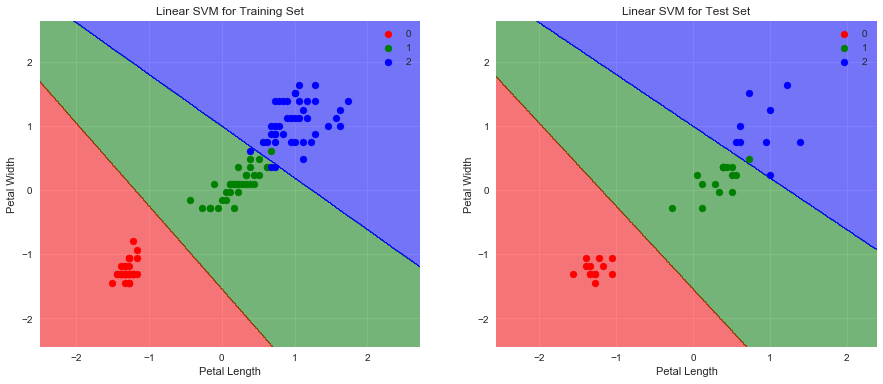

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [467]:
# Linear SVM
#Visualizing the Training and Test Set Results
mapBoundaries(X_train, y_train, X_test, y_test, SVC(kernel='linear', random_state=0), 'Linear SVM' )

Linear SVC is performing quite well as well. 
Let's try a Gaussian SVC now - using the rbf kernel. 

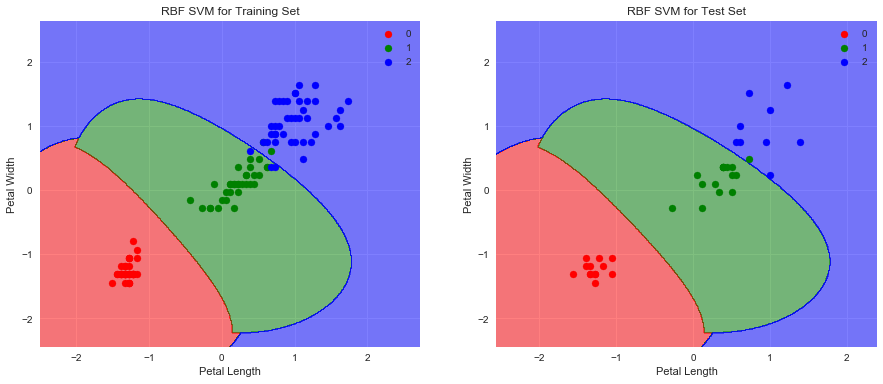

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [468]:
# Gaussian SVC
#Visualizing the Training and Test Set Results
mapBoundaries(X_train, y_train, X_test, y_test, SVC(kernel='rbf', random_state=0), 'RBF SVM' )

Those are some interesting decision boundaries. Let's see if we can tune the C and gamma parameters to improve the performance.

In [469]:
# SVC rbf

# Create the grid of values for the C & gamma parameter
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 0.5]}
print('Parameter Grid : \n{}\n'.format(param_grid))

# We will implement a grid search with a stratified 3 folds cross validation using the SVC estimator
grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=3)

# Fit the estimator on the training data and predict on test data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Outputs
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score (on Training Data): {:.2f}\n".format(grid_search.best_score_))
print("Classification report: \n{}".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print('Test score using SVC: {:.2f}'.format(grid_search.score(X_test, y_test)))

Parameter Grid : 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 0.5]}

Best parameters: {'C': 0.1, 'gamma': 1}
Best cross-validation score (on Training Data): 0.96

Classification report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.94      0.97        16
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38

Confusion Matrix: 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Test score using SVC: 0.97


Looks like there isn't any improvement. 

Let's move onto the next classifier - Naive Bayes.

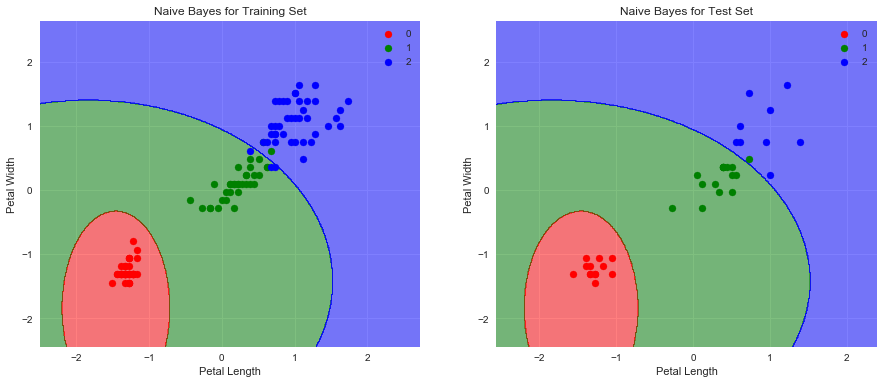

GaussianNB(priors=None)
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [470]:
# Naive Bayes
#Visualizing the Training and Test Set Results
mapBoundaries(X_train, y_train, X_test, y_test, GaussianNB(), 'Naive Bayes' )

This is not a very promising plot. Let's move on to CART algorithms and see how they perform. 

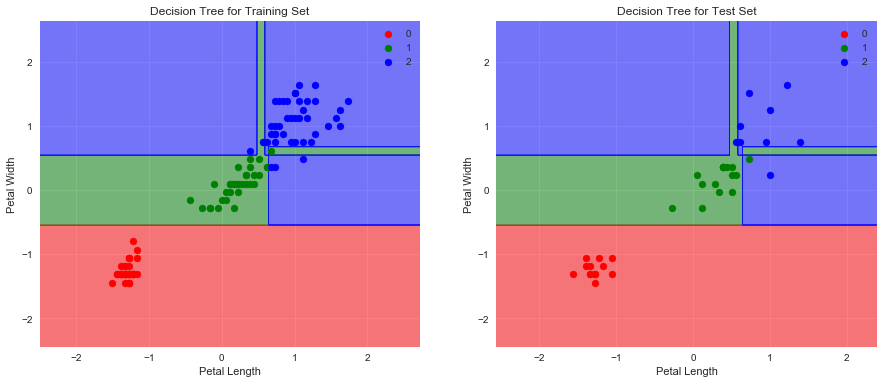

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


In [471]:
# Decision Tree
#Visualizing the Training and Test Set Results
mapBoundaries(X_train, y_train, X_test, y_test, DecisionTreeClassifier(random_state=0), 'Decision Tree' )

This plot seems overfitted. I want to check if we can play around with the parameters to smooth out the boundaries a little. 

In [472]:
#DecisionTreeClassifier

# Create the grid of values for the C parameter
param_grid = {'max_depth' : [1,3,5,10]} 
print('Parameter Grid : \n{}\n'.format(param_grid))

# We will implement a grid search with a stratified 3 folds cross validation using the KNeighborsClassifier estimator
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=3)

# Fit the estimator on the training data and predict on test data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Outputs
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score (on Training Data): {:.2f}\n".format(grid_search.best_score_))
print("Classification report: \n{}".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print('Test score using DecisionTreeClassifier: {:.2f}'.format(grid_search.score(X_test, y_test)))

Parameter Grid : 
{'max_depth': [1, 3, 5, 10]}

Best parameters: {'max_depth': 3}
Best cross-validation score (on Training Data): 0.96

Classification report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.94      0.97        16
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38

Confusion Matrix: 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Test score using DecisionTreeClassifier: 0.97


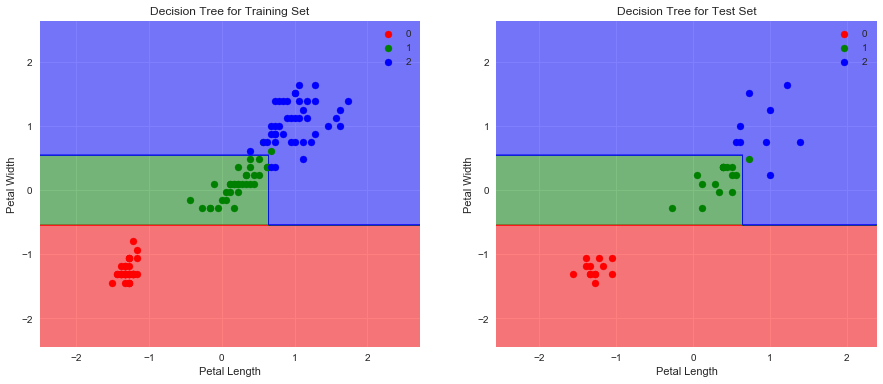

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [473]:
# Boundaries with new parameters
mapBoundaries(X_train, y_train, X_test, y_test, DecisionTreeClassifier(max_depth=3,random_state=0), 'Decision Tree' )

This is a step in the correct direction. Let's see the performance of Random Forest - it should perform better.

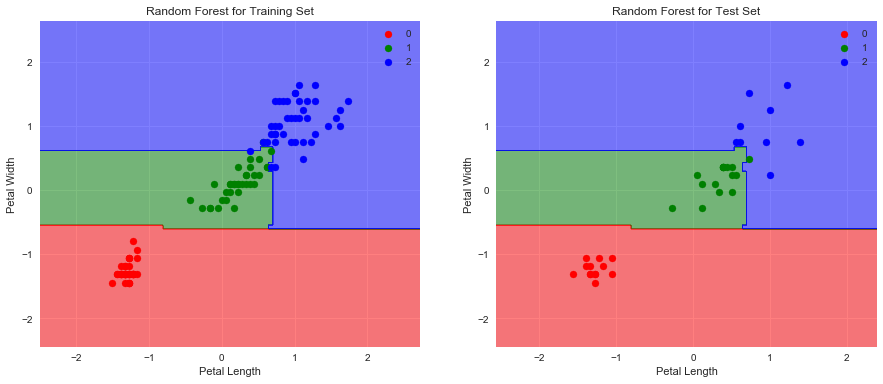

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [474]:
# Random Forest
#Visualizing the Training and Test Set Results
mapBoundaries(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=0), 'Random Forest' )

This result looks good!

We should note here that since the dataset is so small as well, it plays a major factor in the hyperparams tuning and these trials could possibly yield better results given a much larger dataset. 

To conclude the Logistic Regression, Linear SVM and CART models are performing well on this small dataset and the decision boundaries based on the petal lengths and widths give us a good insight for building prediction models. 

This brings me to the end of data exploration, visualization and prediction with the Iris dataset. 